# Project: Wrangling and Analyze Data

In [1]:
#import librabries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#create a folder for image predictions data
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
#Write image predictions data to a file in our folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
image_predictions_df = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
I used the tweet_json.txt provided in classroom because I did not get access to twitter developer account

In [6]:
#create an API object
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

I commented how I could have queried twitter API because I used the file provided in the classroom

In [7]:
# tweet_ids = df_master.tweet_id.values
# len(tweet_ids)
#  Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
#  Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#        for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#              print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
#   print(end - start)
# df_tweets = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')
# df_tweets.head()

In [8]:
with open('tweet_json.txt', 'r') as file:
    lines= file.readlines()
data = [ ]
for line in lines:
    f=json.loads(line)
    data.append({'tweet_id' : f['id'],
                'retweet_count':f['retweet_count'],
                'favorite_count':f['favorite_count']})
df_data=pd.DataFrame(data)
df_data.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Visual Assessment

In [9]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
df_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Programmatic

In [12]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# check for reating denominator less than 10 as we have assumed 10 is the standard
twitter_archive_df.query("rating_denominator <= 9").shape[0]

3

In [15]:
# check ifthere are invalid names 
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1.Timestamp contains unecessary numbers and has wrong datatype

2.unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>

3.Twitter archive contains retweet and replies

4.Drop record from image_predictions_df where p1_dog, p2_dog and p3 dog is false 

5.Remove records that have invalid denominator

6.Some column names in image prediction are not explanatory.

7.Tweet_id is int which will make merging the three datasets difficult

8.Some names in the twitter archive  are invalid

### Tidiness issues
1.Type of dog spread over 4 columns

2.There are 3 dataframes, there should be 1 master dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
df_archive_clean1=twitter_archive_df.copy()
df_predictions_clean = image_predictions_df.copy()
df_tweets_clean = df_data.copy()

### Issue #1: Timestamp has unnecessary numbers and wrong datatype

#### Define:Remove unnecessary numbers

#### Code

In [19]:
# Strip +0000 from timestamp column
df_archive_clean1.timestamp = df_archive_clean1.timestamp.str.strip('+0000')
#convert datatype to datetime
df_archive_clean1['timestamp'] = pd.to_datetime(df_archive_clean1['timestamp'])

#### Test

In [20]:
df_archive_clean1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
df_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #2: unnecessary html tags in source column in place of utility name 

#### Define Remove unnessary tags

#### Code

In [22]:
print(df_archive_clean1.iloc[0].source)
print(df_archive_clean1.iloc[1].source)
print(df_archive_clean1.iloc[2].source)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [23]:
df_archive_clean1.source = df_archive_clean1.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_2072\1166648847.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean1.source = df_archive_clean1.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [24]:
df_archive_clean1.source.value_counts() 


Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [25]:
print(df_archive_clean1.iloc[0].source)

Twitter for iPhone


### Issue #3:  There are retweets in twitter archive which we do not need for our analysis

#### Define:Remove retweets column and related columns

#### Code

In [26]:
#remove the records where retweeted_status_id is not null
df_archive_clean1 = df_archive_clean1[df_archive_clean1.retweeted_status_id.isnull()]

In [27]:
df_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In [28]:
# Remove all the re-tweet related columns as they are not required
retweet_columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_archive_clean1.drop(retweet_columns, axis=1, inplace=True)

In [30]:
# remove the reply columns
reply_columns = ['in_reply_to_status_id','in_reply_to_user_id']
df_archive_clean1.drop(reply_columns, axis = 1, inplace=True)
#remove retweet_count in df_tweets_dataframe
reet=['retweet_count']
df_tweets_clean.drop(reet,axis=1, inplace=True)

#### Test

In [31]:
# Test if the re-tweet columns were removed
assert 'retweeted_status_id' not in df_archive_clean1.columns

In [32]:
# Test the reply columns are removed from the dataset
assert 'in_reply_to_status_id' not in df_archive_clean1.columns

### Issue #4: Drop record from df_predictions_clean where p1_dog, p2_dog,p3_dog is false 

#### Define:Drop rows with entries that have False p1_dog, p2_dog, & p3_dog values

#### Code

In [33]:
#Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
df_predictions_clean = df_predictions_clean[((df_predictions_clean['p1_dog'] == True) & 
                  (df_predictions_clean['p2_dog'] == True) & 
                  (df_predictions_clean['p3_dog'] == True))]

#### Test

In [34]:
df_predictions_clean[((df_predictions_clean['p1_dog'] == False) & 
                  (df_predictions_clean['p2_dog'] == False) & 
                  (df_predictions_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #5: Remove records that have invalid denominator

#### Define:Remove records that have denominator less than 10

#### Code

In [35]:
# remove the records that have the denominator less than 10
df_archive_clean1 = df_archive_clean1[df_archive_clean1.rating_denominator > 9]

#### Test

In [36]:
df_archive_clean1.query("rating_denominator <= 9").shape[0]

0

### Issue #6: Some column names in image predictions are not self explanatory

#### Define:Rename column names

#### Code

In [37]:
df_predictions_clean.rename(columns = {'p1':'Prediction1','p1_conf':'Prediction1_cofidence','p1_dog':'Prediction1_isdog','p2':'Prediction2','p2_conf':'Prediction2_cofidence','p2_dog':'Prediction2_isdog','p3':'Prediction3','p3_conf':'Prediction3_cofidence','p3_dog':'Prediction3_isdog' }, inplace = True)

#### Test

In [38]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1243 non-null   int64  
 1   jpg_url                1243 non-null   object 
 2   img_num                1243 non-null   int64  
 3   Prediction1            1243 non-null   object 
 4   Prediction1_cofidence  1243 non-null   float64
 5   Prediction1_isdog      1243 non-null   bool   
 6   Prediction2            1243 non-null   object 
 7   Prediction2_cofidence  1243 non-null   float64
 8   Prediction2_isdog      1243 non-null   bool   
 9   Prediction3            1243 non-null   object 
 10  Prediction3_cofidence  1243 non-null   float64
 11  Prediction3_isdog      1243 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


### Issue #7: tweet_id are of int datatype

#### Define:convert tweet_id to strings

#### Code

In [39]:
# Convert data type of tweet_id in all tables to object string data type for merging
df_archive_clean1.tweet_id = df_archive_clean1.tweet_id.astype(str)
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype(str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)

#### Test

In [40]:
df_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2172 non-null   object        
 1   timestamp           2172 non-null   datetime64[ns]
 2   source              2172 non-null   object        
 3   text                2172 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2172 non-null   int64         
 6   rating_denominator  2172 non-null   int64         
 7   name                2172 non-null   object        
 8   doggo               2172 non-null   object        
 9   floofer             2172 non-null   object        
 10  pupper              2172 non-null   object        
 11  puppo               2172 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.6+ KB


In [41]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1243 non-null   object 
 1   jpg_url                1243 non-null   object 
 2   img_num                1243 non-null   int64  
 3   Prediction1            1243 non-null   object 
 4   Prediction1_cofidence  1243 non-null   float64
 5   Prediction1_isdog      1243 non-null   bool   
 6   Prediction2            1243 non-null   object 
 7   Prediction2_cofidence  1243 non-null   float64
 8   Prediction2_isdog      1243 non-null   bool   
 9   Prediction3            1243 non-null   object 
 10  Prediction3_cofidence  1243 non-null   float64
 11  Prediction3_isdog      1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 100.8+ KB


In [42]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


### Issue #8: Some names in the twitter archive  are invalid

#### Define:Drop invalid names

#### Code

In [43]:
# Use a regex to find name entries that are uppercase
df_archive_clean1['name'] = df_archive_clean1.name.str.extract('\\b([A-Z]\\S*)\\b')



In [44]:
# Drop rows that contain NaN in the name column
df_archive_clean1.dropna(subset=['name'], inplace=True)

In [45]:
# Drop  rows that contain None in the name column
df_archive_clean1 = df_archive_clean1[df_archive_clean1.name != 'None']

#### Test

In [46]:
df_archive_clean1['name'].value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Sephie         1
Bonaparte      1
Wishes         1
Rose           1
Christoper     1
Name: name, Length: 930, dtype: int64

# Tidiness

### Issue #1Type of dog spread over 4 columns

#### Define Create1 column named category and drop the four columns

#### Code

In [47]:
categories = ['doggo', 'floofer', 'pupper', 'puppo']
for category in categories:
    df_archive_clean1[category] = df_archive_clean1[category].apply(lambda x: np.NaN if x == 'None' else x)
    
df_archive_clean1['category'] = df_archive_clean1[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_archive_clean1['category'] = df_archive_clean1['category'].apply(lambda x: x.replace('nan', ''))
df_archive_clean1['category'] = df_archive_clean1['category'].apply(lambda x: np.NaN if x == '' else x)

df_archive_clean1['category'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                       
                                '':None}, inplace=True)

In [48]:
# Drop individual dog stage columns
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean1.drop(cols, axis=1, inplace=True)

#### Test

In [49]:
df_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1390 non-null   object        
 1   timestamp           1390 non-null   datetime64[ns]
 2   source              1390 non-null   object        
 3   text                1390 non-null   object        
 4   expanded_urls       1390 non-null   object        
 5   rating_numerator    1390 non-null   int64         
 6   rating_denominator  1390 non-null   int64         
 7   name                1390 non-null   object        
 8   category            184 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 108.6+ KB


### Issue #2 There are 3 dataframes, there should be 1 master dataframe

#### Define Merge the three datasets into 1 master

#### Code

In [50]:
# Merge the archive clean and prediction clean dataframes into a single data frame
twitter_archive_master = pd.merge(df_archive_clean1, df_predictions_clean, on='tweet_id')
# Merge the tweet_json dataframe into the twiter_archive_master data frame
twitter_archive_master = pd.merge(twitter_archive_master, df_tweets_clean, on='tweet_id')


#### Test

In [51]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 850
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               851 non-null    object        
 1   timestamp              851 non-null    datetime64[ns]
 2   source                 851 non-null    object        
 3   text                   851 non-null    object        
 4   expanded_urls          851 non-null    object        
 5   rating_numerator       851 non-null    int64         
 6   rating_denominator     851 non-null    int64         
 7   name                   851 non-null    object        
 8   category               111 non-null    object        
 9   jpg_url                851 non-null    object        
 10  img_num                851 non-null    int64         
 11  Prediction1            851 non-null    object        
 12  Prediction1_cofidence  851 non-null    float64       
 13  Predi

In [52]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category,jpg_url,...,Prediction1,Prediction1_cofidence,Prediction1_isdog,Prediction2,Prediction2_cofidence,Prediction2_isdog,Prediction3,Prediction3_cofidence,Prediction3_isdog,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048
3,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226
4,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
twitter_archive_master.name.value_counts()

Cooper     9
Charlie    8
Oliver     7
Koda       6
Sadie      6
          ..
Mairi      1
Stormy     1
Dallas     1
Mattie     1
Walter     1
Name: name, Length: 631, dtype: int64

In [55]:

#Find total ocurrence of each dog category
twitter_archive_master.category.value_counts()

pupper          69
doggo           22
puppo           13
floofer          4
doggo pupper     3
Name: category, dtype: int64

In [56]:
# Find dog with the most favorite count
twitter_archive_master.groupby('name')['favorite_count'].sum().sort_values(ascending=False)


name
Bo            136148
Zoey          113237
Duddles       107956
Stephan       107015
Jamesy        106827
               ...  
Kenneth          235
Keet             227
Fwed             211
Christoper       196
Walter           129
Name: favorite_count, Length: 631, dtype: int64

### Insights:
1.The most common dog name is Cooper

2.Pupper is the most common category

3.Bo has the highest favorite count while Walter has the least favorite count

### Visualization

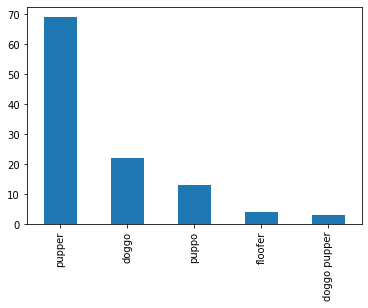

In [57]:
twitter_archive_master['category'].value_counts().plot(kind='bar');